In [1]:
%matplotlib inline
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import scipy.stats
import pandas.io.sql as psql
import psycopg2 as pg
from statsmodels import api as sm
import itertools
plt.style.use('ggplot')

# Database connection
with pg.connect(database='research') as conn:
    sql = 'SELECT full_name, age, size, commits, internal_cohesion, degree_centrality, firm_involvement \
        FROM repositories where id < 1000;'
    data = psql.read_sql(sql, conn)

sub = data[["age", "size", "commits", "internal_cohesion", "firm_involvement", "degree_centrality"]]
sub_data = sub.copy()

sub_data["age"] = pd.to_numeric(sub_data["age"], errors="coerce")
sub_data["size"] = pd.to_numeric(sub_data["size"], errors="coerce")
sub_data["commits"] = pd.to_numeric(sub_data["commits"], errors="coerce")
sub_data["internal_cohesion"] = pd.to_numeric(sub_data["internal_cohesion"], errors="coerce")
sub_data["firm_involvement"] = pd.to_numeric(sub_data["firm_involvement"], errors="coerce")
sub_data["degree_centrality"] = pd.to_numeric(sub_data["degree_centrality"], errors="coerce")

## descriptive statistic

In [2]:
labels = ["age", "size", "commits", "internal_cohesion", "firm_involvement", "degree_centrality"]
ds = pd.DataFrame(index=labels)
# for l in labels:
#     ds[]
ds['mean'] = sub_data.mean()
ds['std'] = sub_data.std()
ds['max'] = sub_data.max()
ds['min'] = sub_data.min()
ds

,mean,std,max,min
age,569.935872,286.939028,1310.0,2
size,16244.716433,51610.624737,823734.0,15
commits,634.119238,1380.129031,14504.0,0
internal_cohesion,1.034713,1.908950,22.5,0
firm_involvement,0.407816,0.491675,1.0,0
degree_centrality,20.064257,52.604582,464.0,0


In [3]:
sub_data["ic_fi"] = sub_data["internal_cohesion"] * sub_data["firm_involvement"]
sub_data["dc_fi"] = sub_data["degree_centrality"] * sub_data["firm_involvement"]

ic = sub_data["internal_cohesion"]
dc = sub_data["degree_centrality"]
sub_data["ic_n"] = (ic - ic.mean()) / (ic.max() - ic.min())
sub_data["dc_n"] = (dc - dc.mean()) / (dc.max() - dc.min())

ic_fi = sub_data['ic_fi']
dc_fi = sub_data['dc_fi']

sub_data['ic_fi_n'] = (ic_fi - ic_fi.mean()) / (ic_fi.max() - ic_fi.min())
sub_data['dc_fi_n'] = (dc_fi - dc_fi.mean()) / (dc_fi.max() - dc_fi.min())

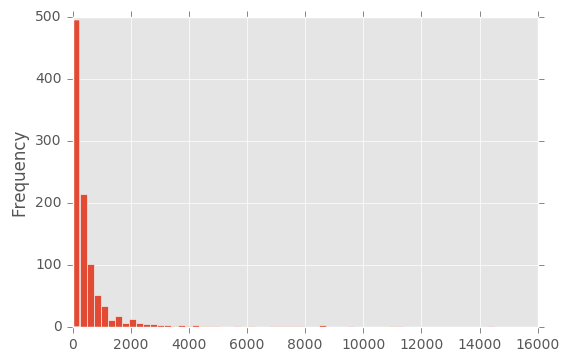

In [15]:
# commits数のヒストグラム
commits_hist = plt.figure()
sub_data['commits'].plot.hist(bins=60)

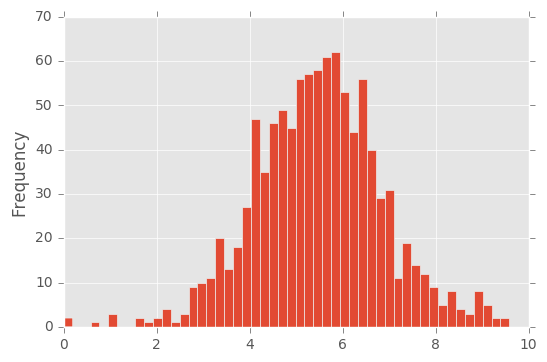

In [5]:
sub_data['ln_commits'] = numpy.log(sub_data['commits'] + 1)
sub_data['ln_commits'].plot.hist(bins=50)

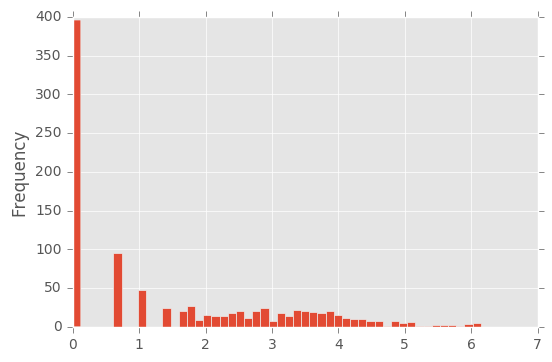

In [6]:
sub_data['ln_dc'] = numpy.log(sub_data['degree_centrality'] + 1)
sub_data['ln_dc'].plot.hist(bins=50)

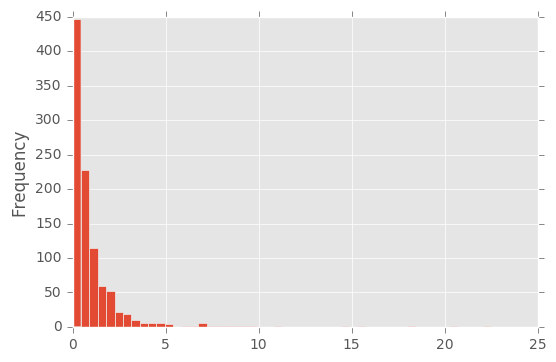

In [7]:
sub_data['internal_cohesion'].plot.hist(bins=50)

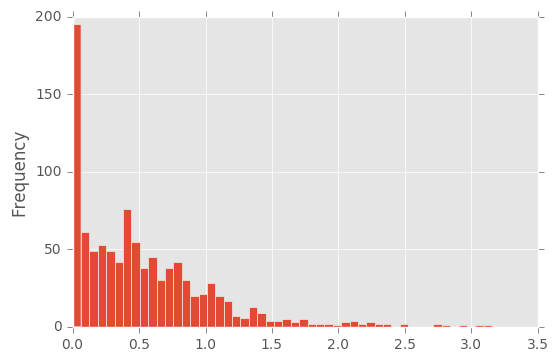

In [8]:
sub_data['ln_ic'] = numpy.log(sub_data['internal_cohesion'] + 1)
sub_data['ln_ic'].plot.hist(bins=50)

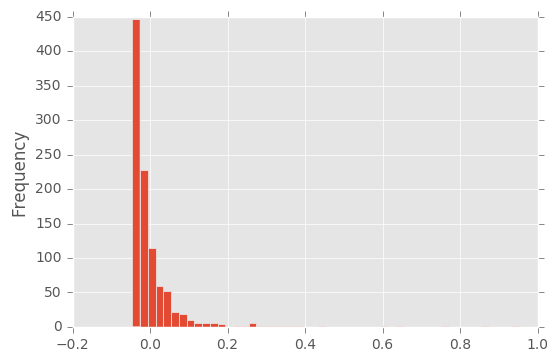

In [13]:
sub_data['ic_n'].plot.hist(bins=50)

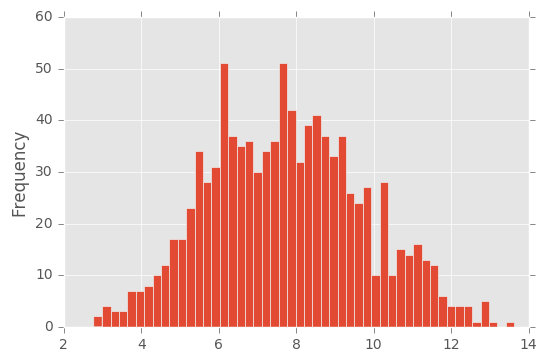

In [21]:
# sub_data['size'].plot.hist(bins=50)
sub_data['ln_size'] = numpy.log(sub_data['size'] + 1)
sub_data['ln_size'].plot.hist(bins=50)

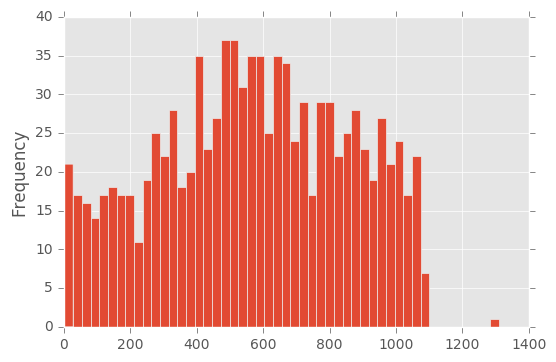

In [22]:
sub_data['age_mc'] = sub_data['age'] / sub_data['age'].max()
sub_data['age'].plot.hist(bins=50)

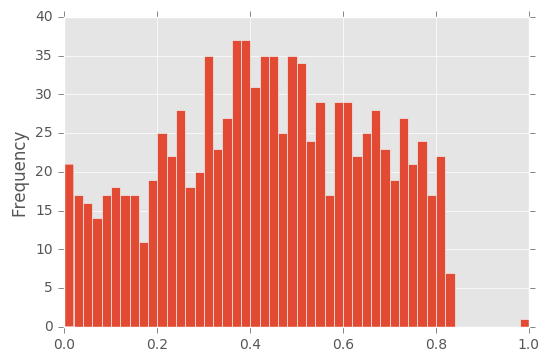

In [25]:
sub_data['age_mc'].plot.hist(bins=50)

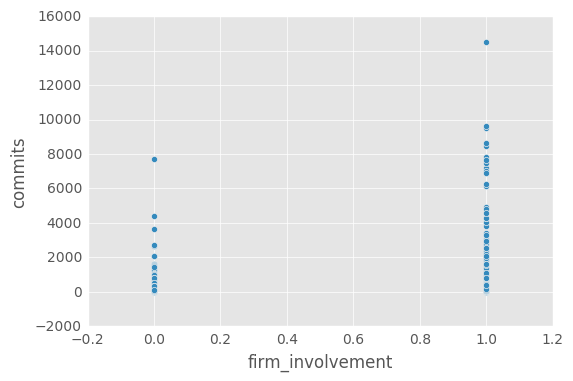

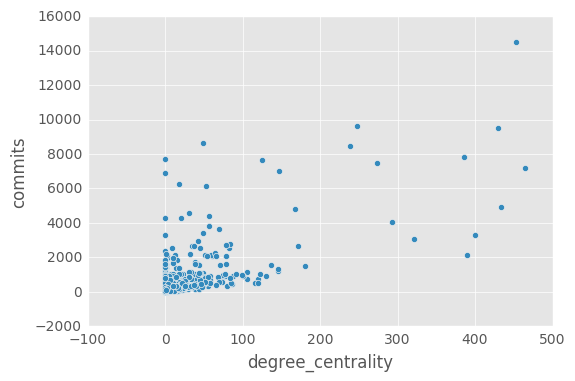

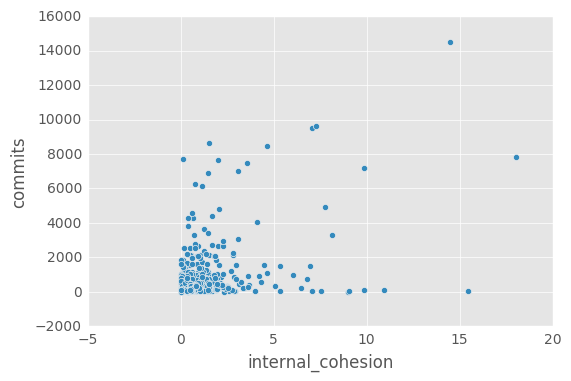

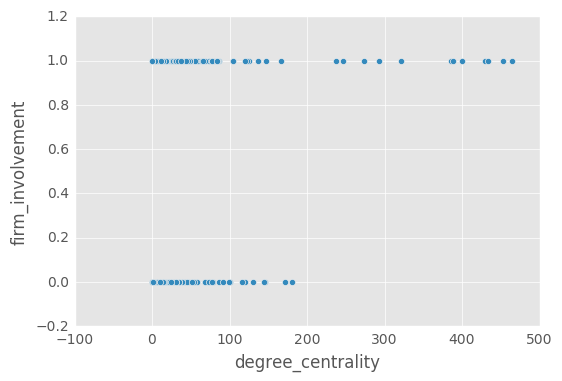

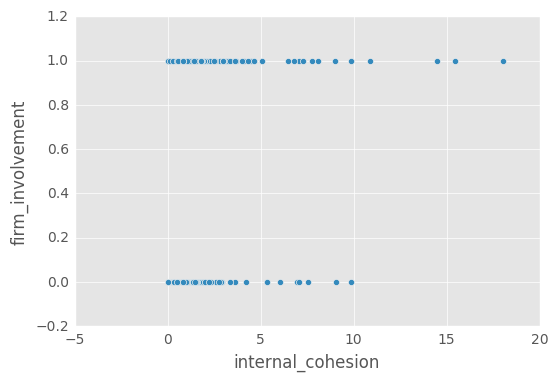

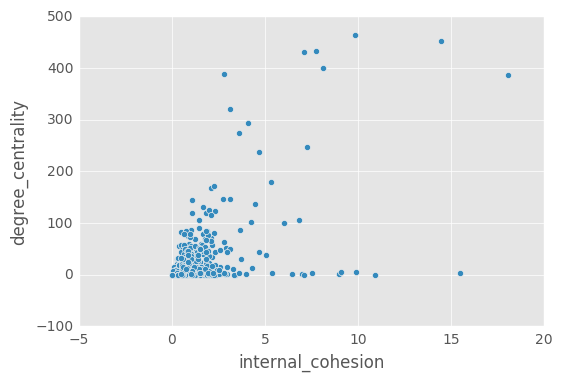

In [67]:
# 散布図
fig = plt.figure()
labels = ['commits', 'firm_involvement', 'degree_centrality', 'internal_cohesion']
for l1, l2 in itertools.combinations(labels, 2):
    sub_data.plot(kind='scatter', x=l2, y=l1)

In [29]:
sub_data.corr(method='pearson')

,age,size,commits,internal_cohesion,firm_involvement,degree_centrality,ic_fi,dc_fi,ic_n,dc_n,ic_fi_n,dc_fi_n,ln_commits,ln_dc,ln_ic,ln_size,age_mc
age,1.000000,0.060145,0.140737,0.052808,0.076691,0.113960,0.077442,0.093194,0.052808,0.113960,0.077442,0.093194,0.344446,0.190153,0.130325,0.154667,1.000000
size,0.060145,1.000000,0.262840,0.087518,0.122566,0.180342,0.141680,0.181965,0.087518,0.180342,0.141680,0.181965,0.205850,0.093958,0.044749,0.556169,0.060145
commits,0.140737,0.262840,1.000000,0.434678,0.258966,0.681609,0.493937,0.648948,0.434678,0.681609,0.493937,0.648948,0.657448,0.435823,0.399870,0.410625,0.140737
internal_cohesion,0.052808,0.087518,0.434678,1.000000,0.162765,0.602862,0.697853,0.503594,1.000000,0.602862,0.697853,0.503594,0.250111,0.409955,0.872132,0.056951,0.052808
firm_involvement,0.076691,0.122566,0.258966,0.162765,1.000000,0.196396,0.459424,0.327735,0.162765,0.196396,0.459424,0.327735,0.341847,0.232124,0.259250,0.215110,0.076691
degree_centrality,0.113960,0.180342,0.681609,0.602862,0.196396,1.000000,0.618581,0.891589,0.602862,1.000000,0.618581,0.891589,0.494856,0.681609,0.573858,0.272165,0.113960
ic_fi,0.077442,0.141680,0.493937,0.697853,0.459424,0.618581,1.000000,0.720671,0.697853,0.618581,1.000000,0.720671,0.309798,0.390578,0.654240,0.150249,0.077442
dc_fi,0.093194,0.181965,0.648948,0.503594,0.327735,0.891589,0.720671,1.000000,0.503594,0.891589,0.720671,1.000000,0.425437,0.531187,0.481099,0.247844,0.093194
ic_n,0.052808,0.087518,0.434678,1.000000,0.162765,0.602862,0.697853,0.503594,1.000000,0.602862,0.697853,0.503594,0.250111,0.409955,0.872132,0.056951,0.052808
dc_n,0.113960,0.180342,0.681609,0.602862,0.196396,1.000000,0.618581,0.891589,0.602862,1.000000,0.618581,0.891589,0.494856,0.681609,0.573858,0.272165,0.113960


In [69]:
model = sm.formula.ols(formula='commits ~ internal_cohesion_c + degree_centrality_c + ic_fi_c + dc_fi_c + firm_involvement', data=sub_data)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                commits   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     110.4
Date:                Thu, 05 Jan 2017   Prob (F-statistic):           4.13e-82
Time:                        23:54:45   Log-Likelihood:                -4945.2
No. Observations:                 593   AIC:                             9902.
Df Residuals:                     587   BIC:                             9929.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                  640.8468     61.332     10.449      0.000       520.389   761.304
firm_involvement[T.True]   236.5879    102.377      2.311      0.021        35.518   437.657
internal_cohesion_c        -10.5962     48.044     -0.221      0.826      -104.955    83.763
degree_centrality_c          9.8741      2.208      4.472      0.000         5.537    14.211
ic_fi_c                     55.2325     59.835      0.923      0.356       -62.284   172.749
dc_fi_c                      6.2434      2.436      2.563      0.011         1.460    11.027
==============================================================================
Omnibus:                      448.878   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9796.214
Skew:                           3.132   Prob(JB):                         0.00
Kurtosis:                      21.901   Cond. No.                         220.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
model2 = sm.formula.ols(formula='commits ~ internal_cohesion_c + ic_fi_c + firm_involvement', data=sub_data)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                commits   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     65.80
Date:                Thu, 05 Jan 2017   Prob (F-statistic):           1.05e-36
Time:                        23:54:46   Log-Likelihood:                -5056.0
No. Observations:                 593   AIC:                         1.012e+04
Df Residuals:                     589   BIC:                         1.014e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                  652.7511     73.286      8.907      0.000       508.817   796.685
firm_involvement[T.True]   209.4370    121.565      1.723      0.085       -29.316   448.190
internal_cohesion_c         64.4353     54.179      1.189      0.235       -41.972   170.842
ic_fi_c                    331.2573     63.658      5.204      0.000       206.233   456.281
==============================================================================
Omnibus:                      399.024   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6995.601
Skew:                           2.710   Prob(JB):                         0.00
Kurtosis:                      18.929   Cond. No.                         6.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
model3 = sm.formula.ols(formula='commits ~ degree_centrality_c + dc_fi_c + firm_involvement', data=sub_data)
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                commits   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     183.6
Date:                Thu, 05 Jan 2017   Prob (F-statistic):           5.00e-84
Time:                        23:54:46   Log-Likelihood:                -4946.0
No. Observations:                 593   AIC:                             9900.
Df Residuals:                     589   BIC:                             9917.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                  621.1077     58.474     10.622      0.000       506.266   735.950
firm_involvement[T.True]   281.6083     93.302      3.018      0.003        98.363   464.854
degree_centrality_c          9.7040      2.068      4.691      0.000         5.642    13.766
dc_fi_c                      7.2204      2.218      3.256      0.001         2.865    11.576
==============================================================================
Omnibus:                      448.871   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10154.712
Skew:                           3.117   Prob(JB):                         0.00
Kurtosis:                      22.291   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model of normalized internal cohesion, normalized degree centrality, moderation effect, fi

In [72]:

model = sm.formula.ols(formula='commits ~ ic_n + dc_n + ic_fi_n + dc_fi_n + firm_involvement', data=sub_data)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                commits   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     110.4
Date:                Thu, 05 Jan 2017   Prob (F-statistic):           4.13e-82
Time:                        23:54:46   Log-Likelihood:                -4945.2
No. Observations:                 593   AIC:                             9902.
Df Residuals:                     587   BIC:                             9929.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                  640.8468     61.332     10.449      0.000       520.389   761.304
firm_involvement[T.True]   236.5879    102.377      2.311      0.021        35.518   437.657
ic_n                      -191.2495    867.136     -0.221      0.826     -1894.317  1511.818
dc_n                      4581.5851   1024.609      4.472      0.000      2569.238  6593.932
ic_fi_n                    996.8797   1079.947      0.923      0.356     -1124.151  3117.910
dc_fi_n                   2896.9485   1130.085      2.563      0.011       677.447  5116.450
==============================================================================
Omnibus:                      448.878   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9796.214
Skew:                           3.132   Prob(JB):                         0.00
Kurtosis:                      21.901   Cond. No.                         44.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
model = sm.formula.ols(formula='commits ~ dc_n + dc_fi_n + firm_involvement', data=sub_data)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                commits   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     183.6
Date:                Thu, 05 Jan 2017   Prob (F-statistic):           5.00e-84
Time:                        23:54:46   Log-Likelihood:                -4946.0
No. Observations:                 593   AIC:                             9900.
Df Residuals:                     589   BIC:                             9917.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                  621.1077     58.474     10.622      0.000       506.266   735.950
firm_involvement[T.True]   281.6083     93.302      3.018      0.003        98.363   464.854
dc_n                      4502.6594    959.772      4.691      0.000      2617.667  6387.652
dc_fi_n                   3350.2458   1029.010      3.256      0.001      1329.270  5371.222
==============================================================================
Omnibus:                      448.871   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10154.712
Skew:                           3.117   Prob(JB):                         0.00
Kurtosis:                      22.291   Cond. No.                         36.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
model = sm.formula.ols(formula='commits ~ ic_n + ic_fi_n + firm_involvement', data=sub_data)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                commits   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     65.80
Date:                Thu, 05 Jan 2017   Prob (F-statistic):           1.05e-36
Time:                        23:54:46   Log-Likelihood:                -5056.0
No. Observations:                 593   AIC:                         1.012e+04
Df Residuals:                     589   BIC:                         1.014e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                  652.7511     73.286      8.907      0.000       508.817   796.685
firm_involvement[T.True]   209.4370    121.565      1.723      0.085       -29.316   448.190
ic_n                      1162.9794    977.863      1.189      0.235      -757.543  3083.501
ic_fi_n                   5978.7967   1148.946      5.204      0.000      3722.267  8235.327
==============================================================================
Omnibus:                      399.024   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6995.601
Skew:                           2.710   Prob(JB):                         0.00
Kurtosis:                      18.929   Cond. No.                         32.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
model = sm.formula.ols(formula='commits ~ ic_n + ic_fi_n + dc_n + dc_fi_n + firm_involvement + age_mc + ln_size', data=sub_data)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                commits   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     163.2
Date:                Fri, 06 Jan 2017   Prob (F-statistic):          4.56e-160
Time:                        01:39:09   Log-Likelihood:                -8231.8
No. Observations:                 996   AIC:                         1.648e+04
Df Residuals:                     988   BIC:                         1.652e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                 -785.8945    133.107     -5.904      0.000     -1047.099  -524.690
firm_involvement[T.True]   157.3881     72.264      2.178      0.030        15.580   299.196
ic_n                      1293.3531    592.333      2.183      0.029       130.978  2455.728
ic_fi_n                    112.1645    724.231      0.155      0.877     -1309.043  1533.372
dc_n                      4938.9215    706.493      6.991      0.000      3552.523  6325.320
dc_fi_n                   2132.7174    806.354      2.645      0.008       550.355  3715.080
age_mc                     207.8213    138.929      1.496      0.135       -64.808   480.450
ln_size                    163.3509     16.030     10.190      0.000       131.894   194.808
==============================================================================
Omnibus:                      936.894   Durbin-Watson:                   2.171
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52815.876
Skew:                           4.168   Prob(JB):                         0.00
Kurtosis:                      37.687   Cond. No.                         318.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
model = sm.formula.ols(formula='commits ~ ic_n + ic_fi_n + dc_n + dc_fi_n + firm_involvement', data=sub_data)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                commits   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     185.8
Date:                Fri, 06 Jan 2017   Prob (F-statistic):          1.42e-139
Time:                        01:48:31   Log-Likelihood:                -8284.9
No. Observations:                 996   AIC:                         1.658e+04
Df Residuals:                     990   BIC:                         1.661e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                  514.2256     43.919     11.708      0.000       428.040   600.411
firm_involvement[T.True]   296.5168     74.862      3.961      0.000       149.611   443.422
ic_n                       504.8116    619.136      0.815      0.415      -710.158  1719.782
ic_fi_n                    171.7966    762.919      0.225      0.822     -1325.327  1668.920
dc_n                      6452.3792    728.410      8.858      0.000      5022.974  7881.784
dc_fi_n                   1564.8878    847.313      1.847      0.065       -97.847  3227.623
==============================================================================
Omnibus:                      936.315   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49802.243
Skew:                           4.189   Prob(JB):                         0.00
Kurtosis:                      36.614   Cond. No.                         43.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""